In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format='jpeg'

In [2]:
df=pd.read_csv('data/telecom_churn.csv')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


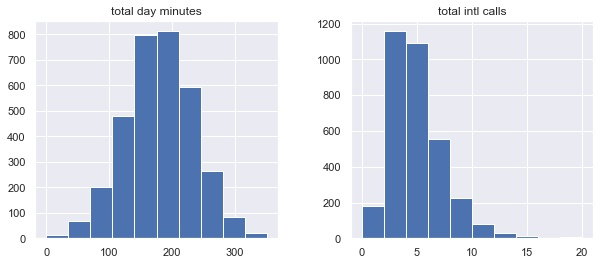

In [4]:
# Histograms
features=['total day minutes'
         ,'total intl calls']
df[features].hist(figsize=(10,4));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C6C9F0C18>,
      dtype=object)

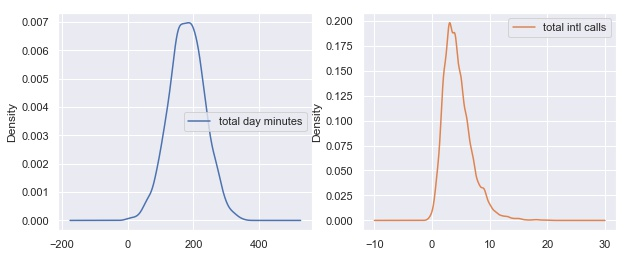

In [5]:
# Density plots
df[features].plot(kind='density'
                 ,subplots=True
                 ,layout=(1,2)
                 ,sharex=False
                 ,figsize=(10,4))

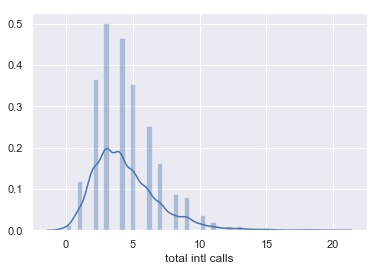

In [6]:
# Lo mismo pero con seaborn
sns.distplot(df['total intl calls'])

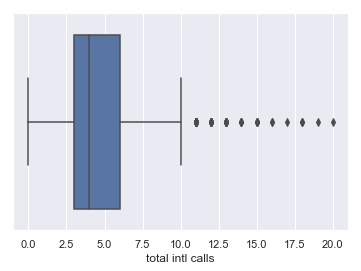

In [7]:
# Boxplot con seaborn
sns.boxplot(x='total intl calls', data=df);
# Teoria:
# largo: Q1 y Q3
# Linea vertical dentro: Mediana
# Whiskers: Linea horizontal que parece intervalo: (Q1-1.5×IQR, Q3+1.5×IQR) donde IQR=Q3-Q1 (Rango Intercuartilico)
# Puntos fuera de los Whiskers: Outliers

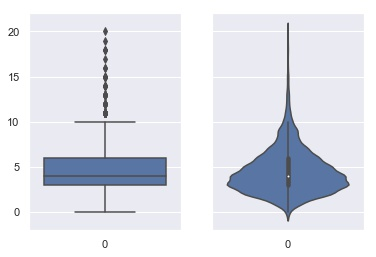

In [8]:
# Violin Plot
_, axes=plt.subplots(1,2,sharey=True, figsize=(6,4)) # ni idea del -, pero sin eso no funciona.
sns.boxplot(data=df['total intl calls']
           ,ax=axes[0]);
sns.violinplot(data=df['total intl calls']
              ,ax=axes[1]);
# TEORIA
# El violinplot ayuda para ver la distribucion suavizada como un conjunto.

In [9]:
df[features].describe()

,total day minutes,total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


In [10]:
# Variables Categoricas y Binarias
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

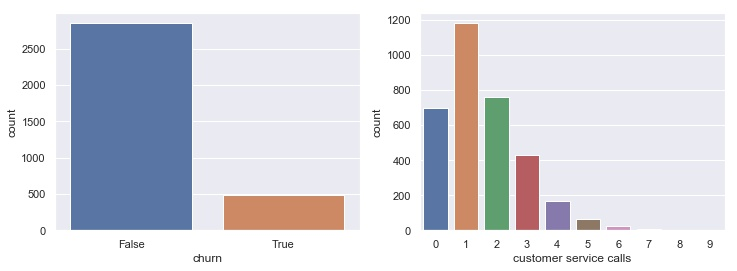

In [11]:
# Count Plot (Box Plot para categoricas)
_, axes=plt.subplots(nrows=1
                   ,ncols=2
                   ,figsize=(12,4))
sns.countplot(x='churn'
             ,data=df
             ,ax=axes[0])
sns.countplot(x='customer service calls'
             ,data=df
             ,ax=axes[1])

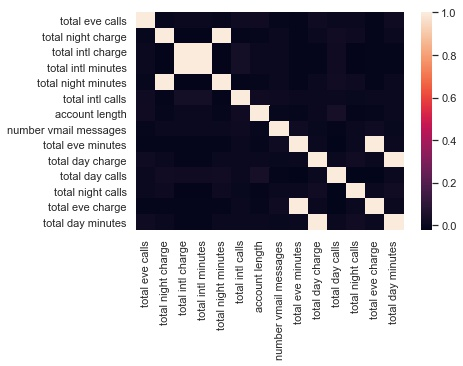

In [12]:
# VIZ MULTIVARIADAS
# Cuantitatva vs. Cuantitatva
# Matriz de Correlación
# Se retiran variables no numericas
numerical=list(set(df.columns)-
              set(['state','international plan','voice mail plan','area code','churn','customer service calls']))
# calcular y plotear
corr_matrix=df[numerical].corr()
sns.heatmap(corr_matrix);

In [13]:
# Eliminamos las variables de alta correlacion por no aportar al modelo.
numerical=list(set(numerical)-
              set(['total day charge','total eve charge','total intl charge','total night charge']))

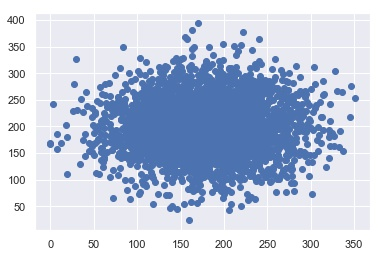

In [14]:
# Scatter Plot
plt.scatter(df['total day minutes'],df['total night minutes']);

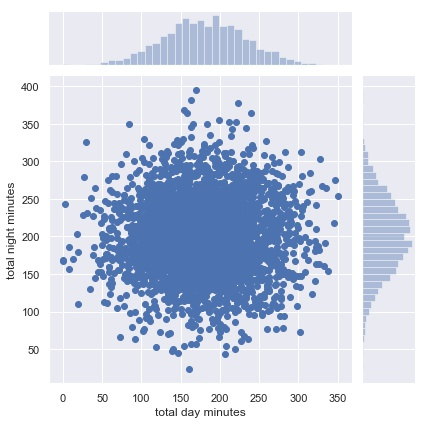

In [15]:
sns.jointplot(x='total day minutes'
           ,y='total night minutes'
           ,data=df
           ,kind='scatter')

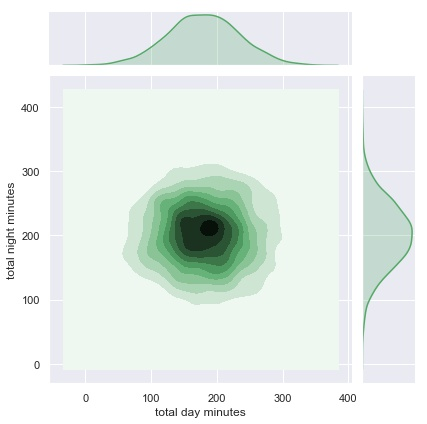

In [16]:
sns.jointplot(x='total day minutes'
             ,y='total night minutes'
             ,data=df
             ,kind='kde'
             ,color='g')

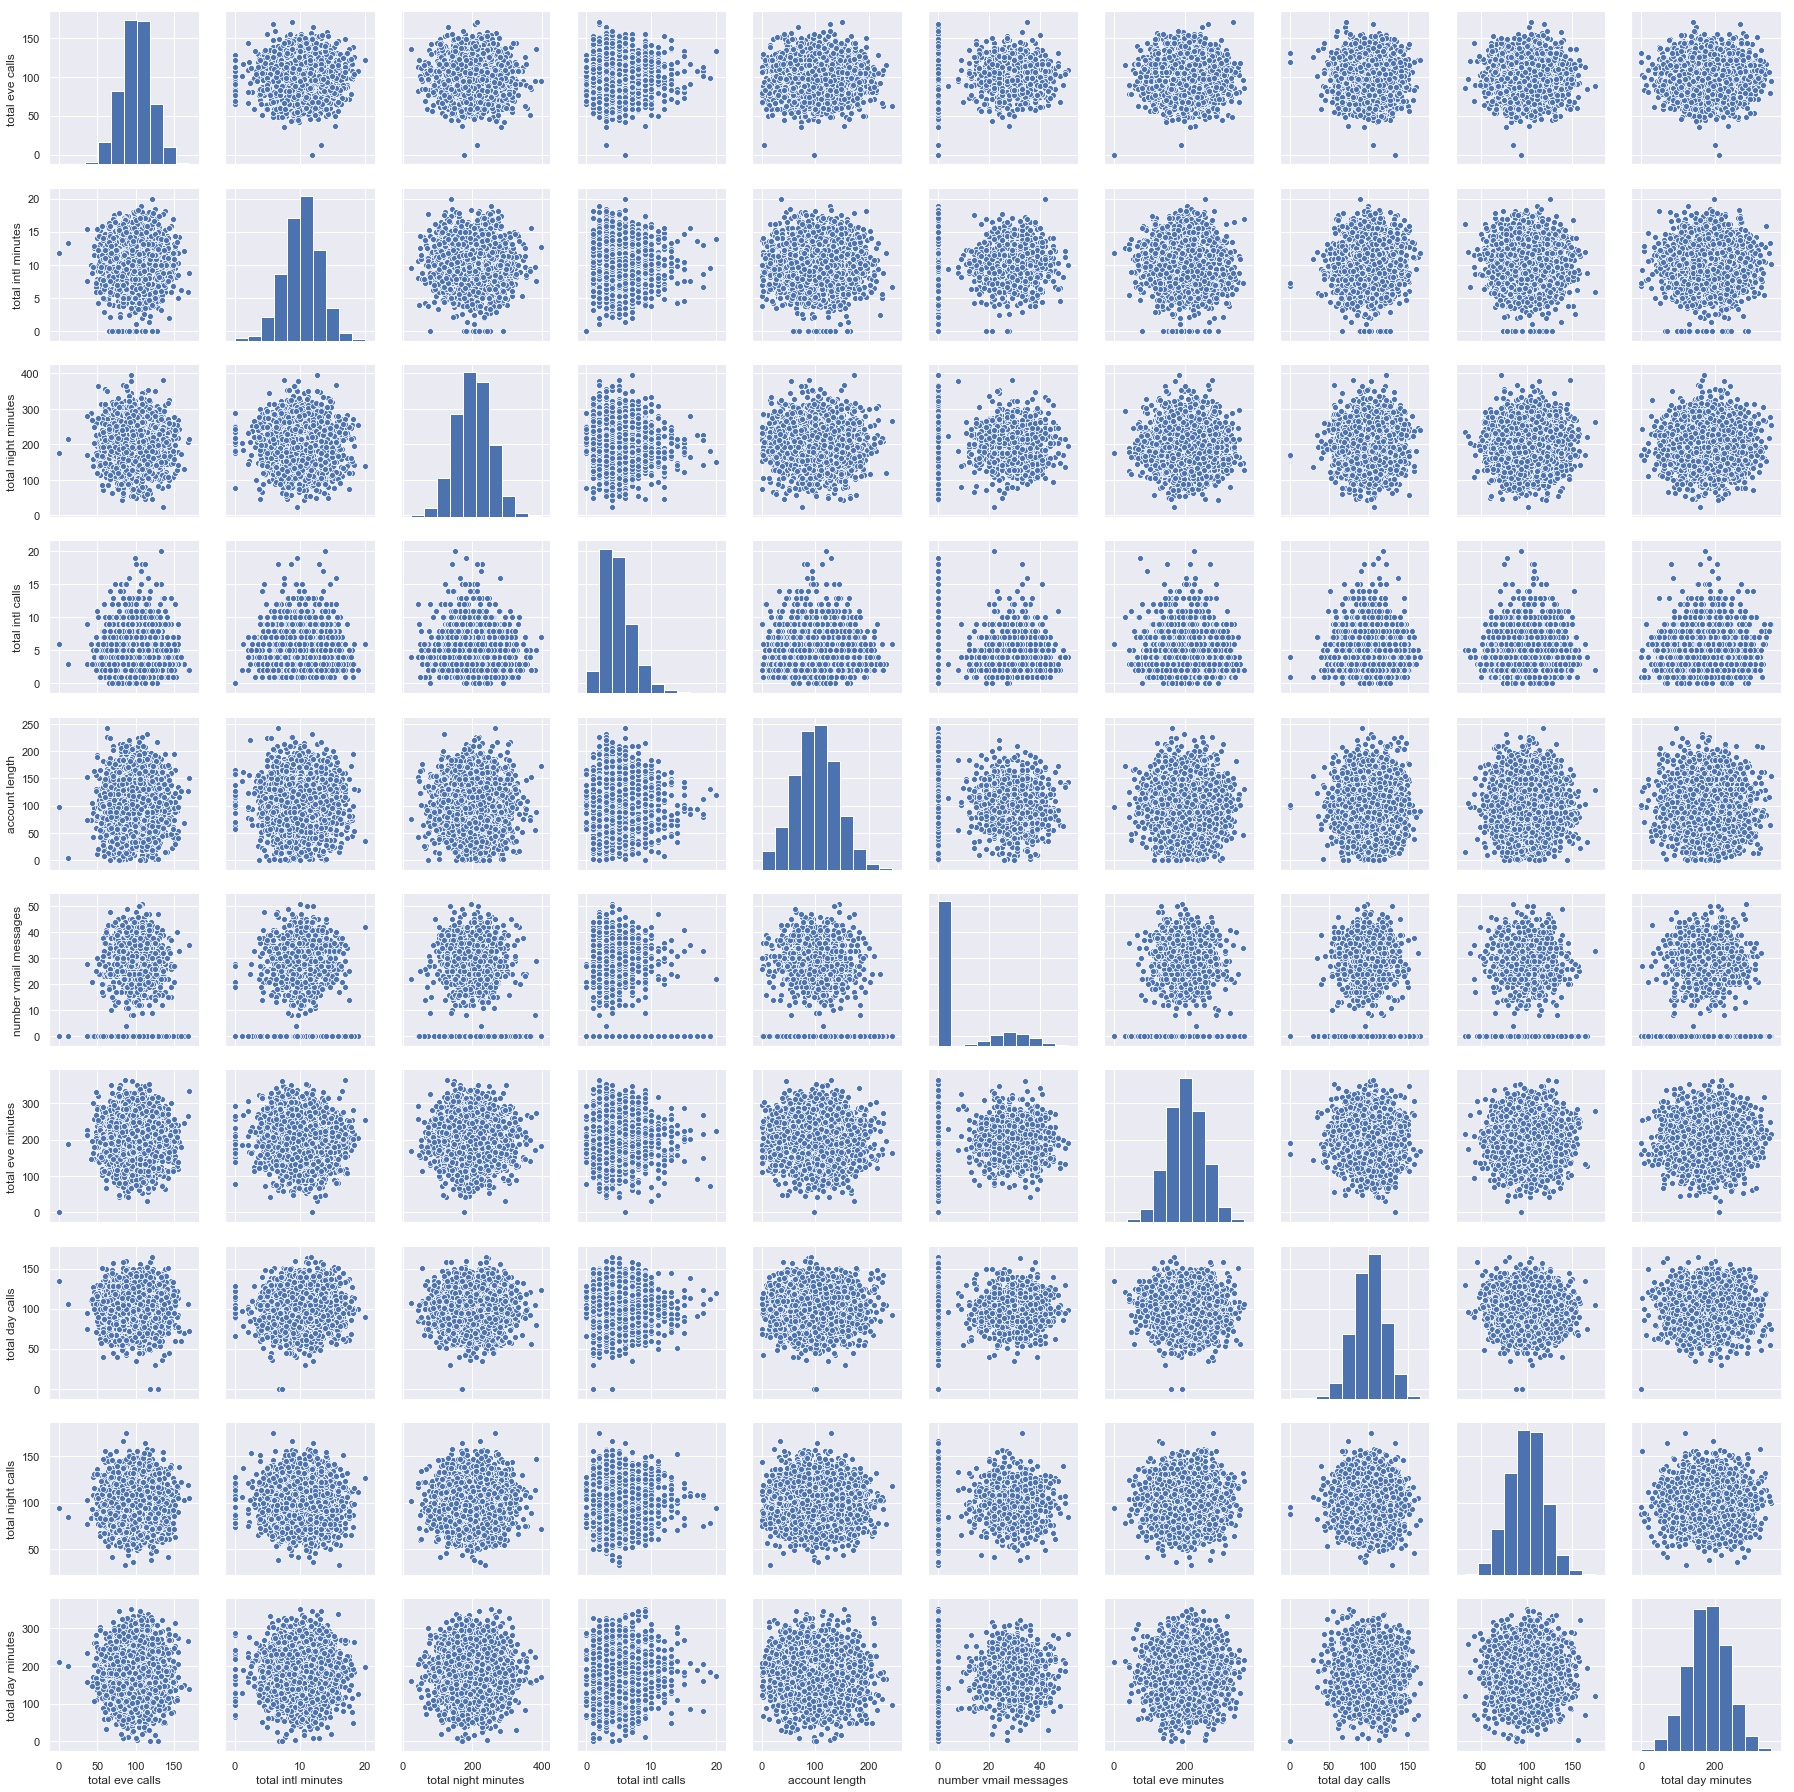

In [17]:
# Matriz de Scatterplots
sns.pairplot(df[numerical])

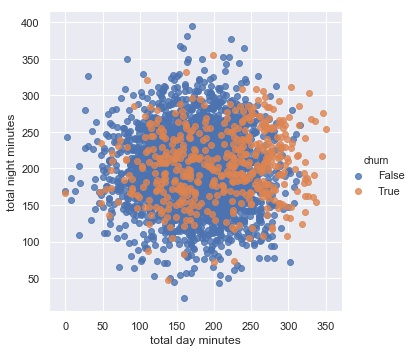

In [18]:
# CUANTITATIVO VS. CATEGORICO
sns.lmplot('total day minutes'
           ,'total night minutes'
           ,data=df
           ,hue='churn'
           ,fit_reg=False);

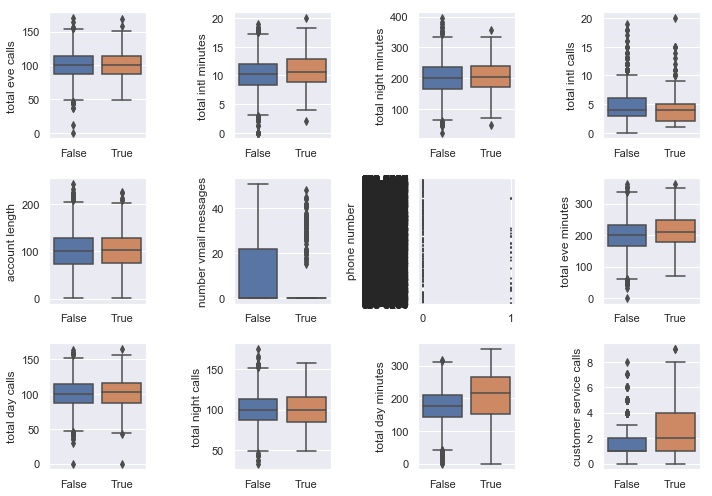

In [19]:
# para trabajar una variable ordinal como si fuese un numerico
numerical.append('customer service calls')

fig, axes=plt.subplots(nrows=3,ncols=4,figsize=(10,7))
for idx, feat in enumerate(numerical):
    ax=axes[int(idx/4), idx%4]
    sns.boxplot(x='churn',y=feat,data=df,ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

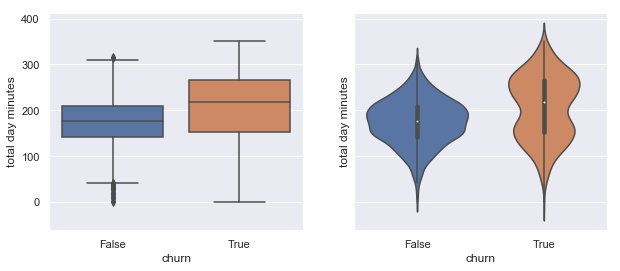

In [20]:
_, axes=plt.subplots(1,2,sharey=True,figsize=(10,4))

sns.boxplot(x='churn',y='total day minutes',data=df,ax=axes[0]);
sns.violinplot(x='churn',y='total day minutes',data=df,ax=axes[1]);

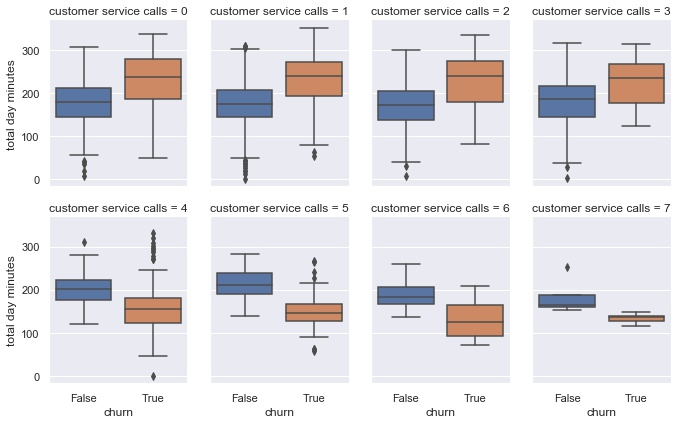

In [21]:
sns.catplot(x='churn'
           ,y='total day minutes'
           ,col='customer service calls'
           ,data=df[df['customer service calls']<8]
           ,kind="box"
            ,col_wrap=4
            ,height=3
            ,aspect=.8);

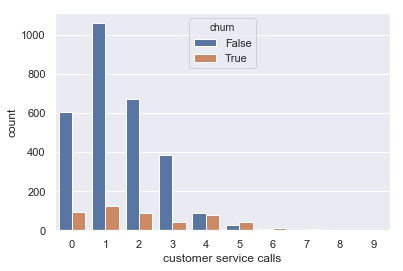

In [22]:
# CATEGORICO VS. CATEGORICO
sns.countplot(x='customer service calls'
             ,hue='churn'
             ,data=df);

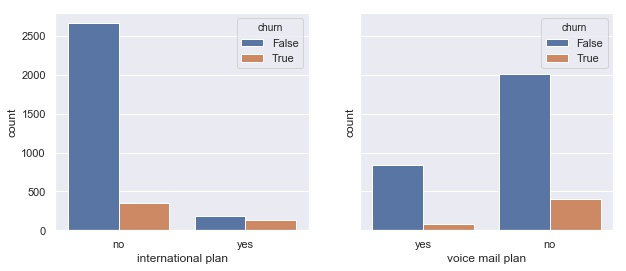

In [23]:
_, axes=plt.subplots(1,2,sharey=True,figsize=(10,4))

sns.countplot(x='international plan'
             ,hue='churn'
             ,data=df
             ,ax=axes[0]);
sns.countplot(x='voice mail plan'
             ,hue='churn'
             ,data=df
             ,ax=axes[1]);

In [24]:
# Tablas de Contingencia
pd.crosstab(df.state,df.churn).T

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In [25]:
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


In [26]:
# VIZ de TODO EL DATASET
# Reducir dimensionalidad: PCA (Lineal) y Manifold Learning (No lineal), el mas conocido de ML es t-SNE
# t-SNE: T Distributed Stochastic Neighbor Embedding

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [35]:
# convertir a 1s y 0s
X=df.drop(['churn','state','phone number'],axis=1)
X['international plan']=X['international plan'].map({'yes':1, 'no':0})
X['voice mail plan']=X['voice mail plan'].map({'yes':1, 'no':0})

In [37]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

C:\Users\DJCA\Miniconda3\envs\mlcourse\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DJCA\Miniconda3\envs\mlcourse\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [38]:
%%time
tsne=TSNE(random_state=17)
tsne_repr=tsne.fit_transform(X_scaled)

Wall time: 44.3 s


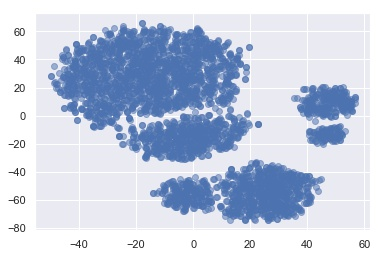

In [39]:
plt.scatter(tsne_repr[:,0]
           ,tsne_repr[:,1]
           ,alpha=.5);

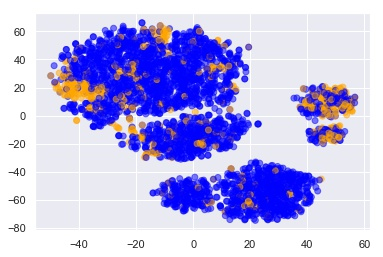

In [41]:
plt.scatter(tsne_repr[:,0]
            ,tsne_repr[:,1]
            ,c=df['churn'].map({False:'blue',True:'orange'})
            ,alpha=.5);

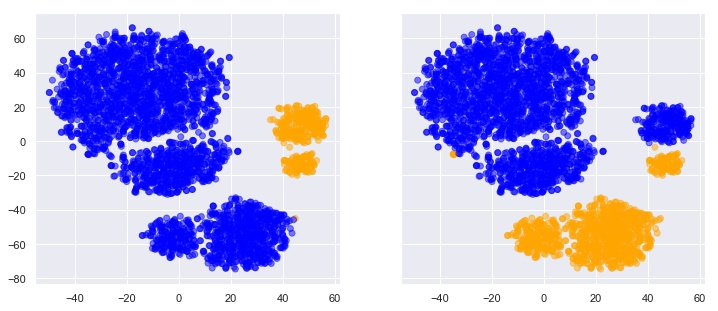

In [42]:
_, axes=plt.subplots(1,2,sharey=True,figsize=(12,5))
for i, name in enumerate(['international plan','voice mail plan']):
    axes[i].scatter(tsne_repr[:,0],tsne_repr[:,1],
                   c=df[name].map({'yes':'orange','no':'blue'}),
                   alpha=.5);